In [2]:
#Importing the dataset from my local machine
from google.colab import files
uploaded = files.upload()

Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


In [3]:
#Importing Libraries
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#Importing warning to ignore any warning during output exection
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Loading the dataset

df = pd.read_csv(io.BytesIO(uploaded['LoanApprovalPrediction.csv']))
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


Only a few columns have missing values.

In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


the missing values are present in LoanAmount, Loan_Amount_Term and Dependents.

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


From the count of the values in each column we can clearly see there are some missing values in LoanAmont, however, based on the standard deviation and the 25, 50 and 75 percentile, we can see that the dataset appears to not have a normal distribution amongst some features.

## **Data Cleaning**

### Handling Null Values

In [9]:
#checking the sum null values
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [10]:
# Checking the sum of null values for columns i might use
df[['Gender', 'Married', 'Dependents', 'Self_Employed']].isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Self_Employed,0


In [11]:
#Checking Datatypes of features and the unique values of loanAmount
print(df['Loan_Amount_Term'].dtype)
print(df['Loan_Amount_Term'].unique())
print("Data type of Credit_History:", df['Credit_History'].dtype)

float64
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Data type of Credit_History: float64


In [12]:
#Checking the reoccurring values in the features 'Dependents' and 'Credit History'
df[['Dependents', 'Credit_History']].mode()

,Dependents,Credit_History
0,0.0,1.0


In [15]:
# Filling the missing values of columns i will most likely use
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



df.isnull().sum()

# Filling missing values with mode for categorical variables
# for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# # Filling missing values with median for numerical variables
# df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True) # used mean instead in the above code.


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


We can see that the null values are completed filled which makes the data alot more clean.

In [16]:
#Checking to see the percentage of missing data in the Gender and Married features
print('percent of missing Gender is %2f%%: ' %((df['Gender'].isnull().sum()/df.shape[0])*100))
print('percent of missing Married is %2f%%: ' %((df['Married'].isnull().sum()/df.shape[0])*100))


percent of missing Gender is 0.000000%: 
percent of missing Married is 0.000000%: 


In [17]:
# Dropping 'Loan ID' since it isnt useful for prediction
df.drop('Loan_ID', axis=1, inplace=True)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


 Dropped the unneccessary column

# **Exploratory Data Analysis (EDA)**

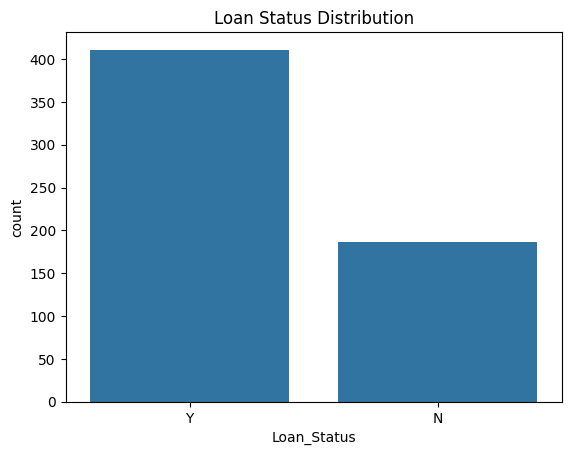

In [18]:
#Visualizing the target variable

sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

We have more people who have been granted loan than those who havent in this dataset

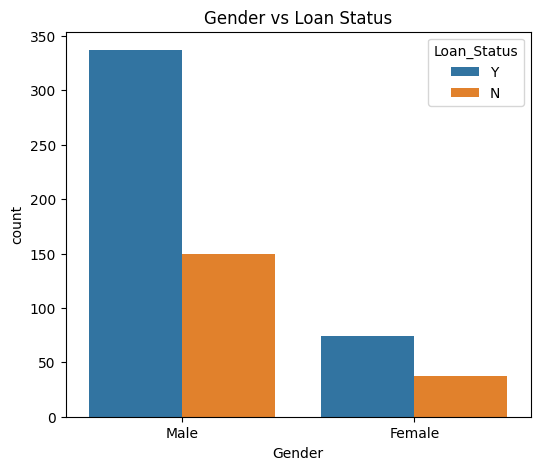

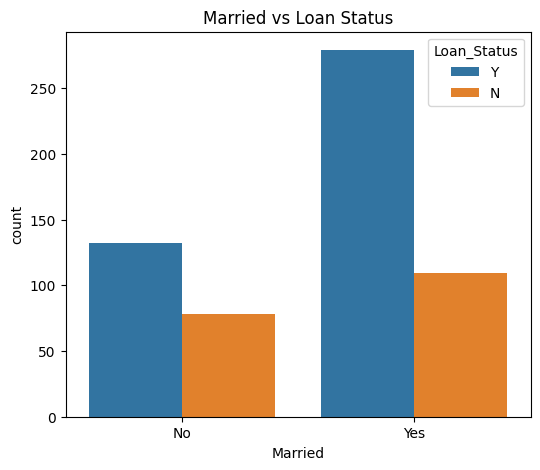

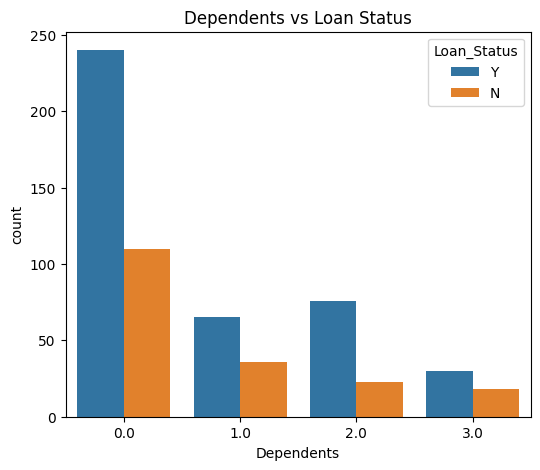

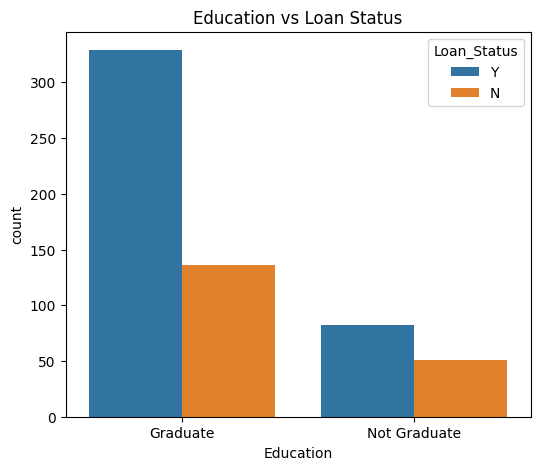

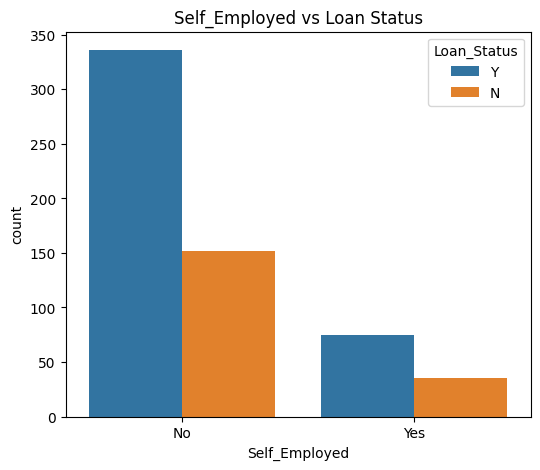

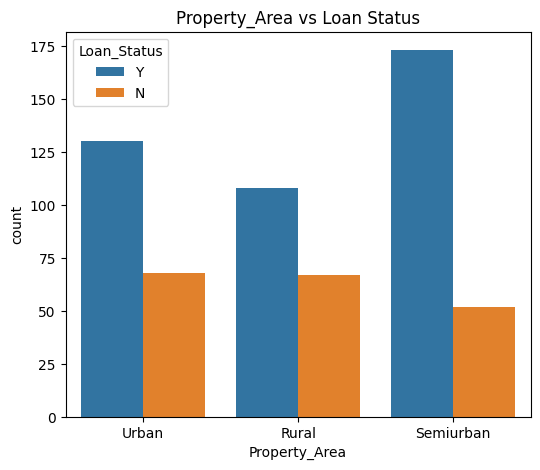

In [19]:
#Checking the loan status of people via different features to see if there are different patters
categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Property_Area']


#this function allows each column to be analyzed individually and the chart can be generated.
for feature in categorical_features:
    plt.figure(figsize=(6, 5)) #setting the figure size width and height to 6 and 5
    sns.countplot(x=feature, hue='Loan_Status', data=df)
    plt.title(f'{feature} vs Loan Status')
    plt.show()


We actually have a weird pattern going on here, we have educated persons taking more loan than uneducated persons, same goes for males vs females, and married persons vs unmarried.

The number of people who take loan as a group by gender: 
Gender
Male      487
Female    111
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

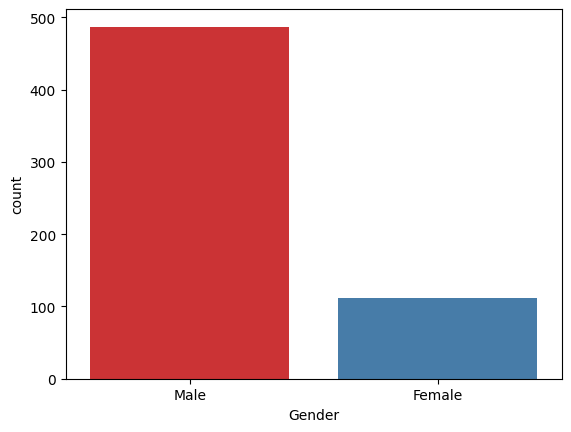

In [20]:
#Trying to see the percentage of male vs female individuals in this dataset

print("The number of people who take loan as a group by gender: ")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

We have more males than females by a wide margin, which actually indicates why the loan status of males are higher than females, not necessarily because men borrow more, which is quite funny if you think of it.

<Axes: >

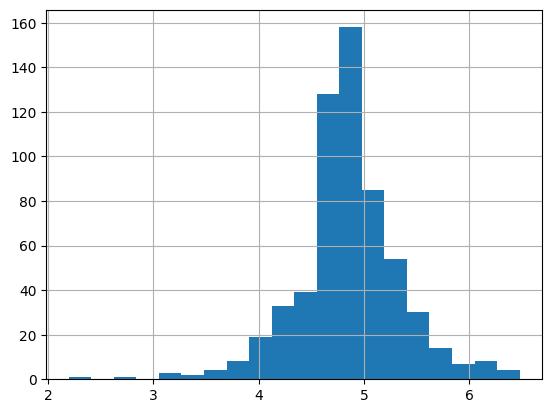

In [21]:
#Using the Log Function to check the distribution pattern of the LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

using the log function, a mathematical function to calculate the natural logrithm of x where x belongs to all the input array elements, this is perfomed independetly for each value, for avoid having a skewed chart or distribution, since some values might make the chart appear not to be normally distributed.

<Axes: >

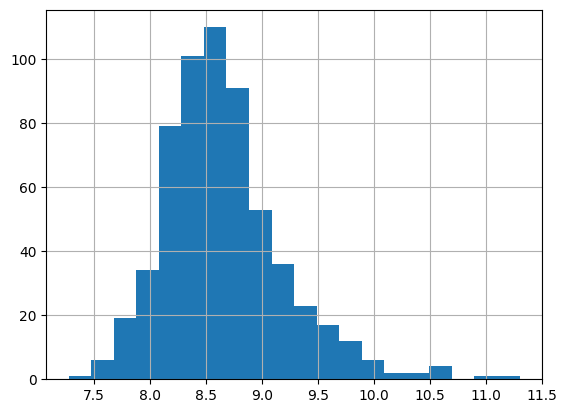

In [22]:
#Combining the two columns to create a new column called TotalIncome and see the distribution pattern
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

## **Feature Engineering**

In [23]:
#Before encoding lets save the dataset and copy it into a new dataframe

df_copy = df.copy()
df_copy.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,Male,No,0.0,Graduate,No,5849,0.0,144.968804,360.0,1.0,Urban,Y,4.976519,5849.0,8.674026
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [24]:
#Changing the Loan_status feature to binary for better performance of the model
# Encode target variable
df_copy['Loan_Status'] = df_copy['Loan_Status'].map({'Y': 1, 'N': 0})

# Encode other categorical variables
label_enc = LabelEncoder()
for column in categorical_features:
    df_copy[column] = label_enc.fit_transform(df_copy[column])

df_copy['Loan_Status'].head()


,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [82]:
#Scaling the numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

df_copy[numerical_features] = scaler.fit_transform(df_copy[numerical_features])
df_copy.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,0.095951,-0.552892,-1.154872e-16,0.274031,1.0,2,1,4.976519,5849.0,8.674026
1,1,1,1,0,0,-0.122234,-0.041852,-2.090562e-01,0.274031,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,-0.395052,-0.552892,-9.728983e-01,0.274031,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,-0.466919,0.246201,-3.076165e-01,0.274031,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,0.121975,-0.552892,-4.889580e-02,0.274031,1.0,2,1,4.948760,6000.0,8.699515


As we can see the features that would stand as the dependent variables are now scaled to improve the performance of the model.

In [83]:
#Selecting specific columns and rows for the training and testing

# x = df_copy.iloc[:, np.r_[0:5, 7:11, 13:15]].values
# y = df_copy.iloc[:, 12].values

In [26]:
# Defining the features and target
X = df_copy.drop('Loan_Status', axis=1)
y = df_copy['Loan_Status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Used the 80-20 split test, although i introduced random state to prevent the models from provided different outputs each time i run them due to the presence of inherent randomness in models like XGboost.

## **Model Training and Evaluation**

### **Random Forest**

RandomForestClassifier Accuracy: 0.825
Confusion Matrix:
 [[17 18]
 [ 3 82]]


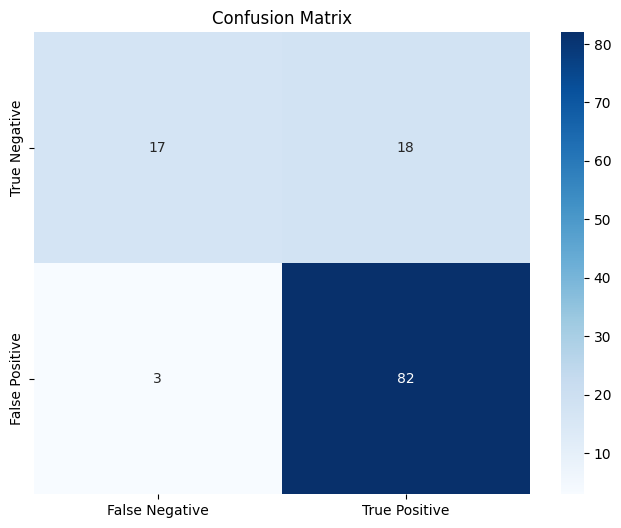

In [34]:
#Training the Randomforest Model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("RandomForestClassifier Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))


# Using Seaborns to create a better visual for understanding the confusion matrix

cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()

This model actually performs very well with an accuracy score of 82, therefore, based on the confusion matrix, the model correctly identified 82% of the actual positive cases (i.e **[True Positive Rate or Recall]**). These results suggest that the model is effectively learning from the independent variables to predict the dependent variable, demonstrating a good capability to classify the data and make accurate predictions in a majority of cases."
majority of cases."

### **KNeighbors Classifier**

KNeighborsClassifier Accuracy: 0.6583333333333333
Confusion Matrix:
 [[ 7 28]
 [13 72]]


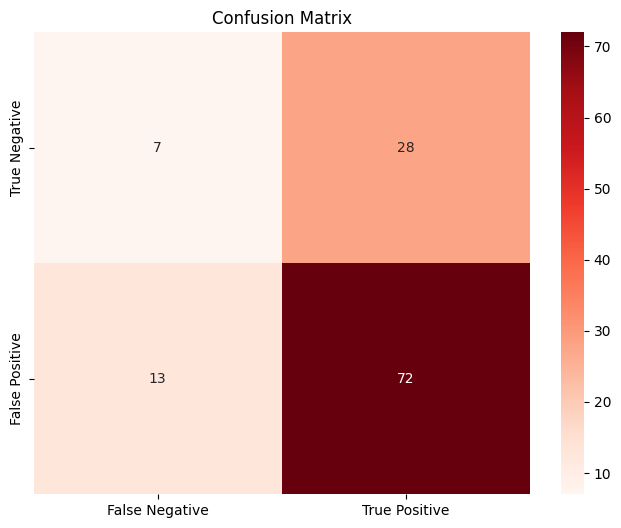

In [35]:
#Using KNeighbors Classifier model for prediction

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNeighborsClassifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


# Using Seaborns to create a better visual for understanding the confusion matrix

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
             xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()

### **Support Vector Classifier**

SVC Accuracy: 0.7
Confusion Matrix:
 [[ 1 34]
 [ 2 83]]


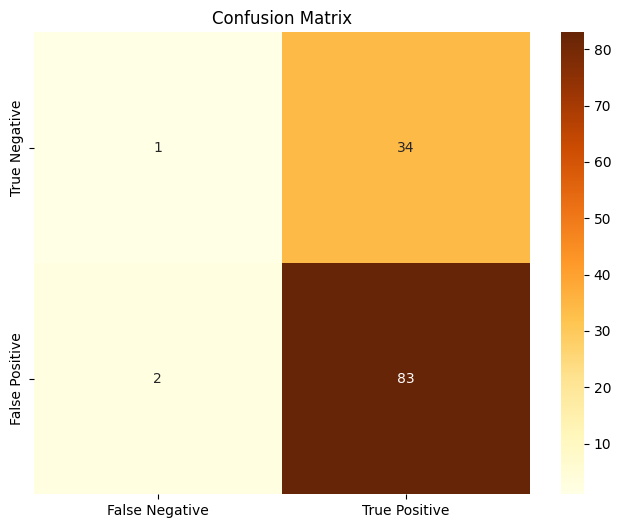

In [33]:
#Using Support Vector Classifier model for prediction

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))

# Creating a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()


### **Logistics Regression**

LogisticRegression Accuracy: 0.8166666666666667
Confusion Matrix:
 [[14 21]
 [ 1 84]]


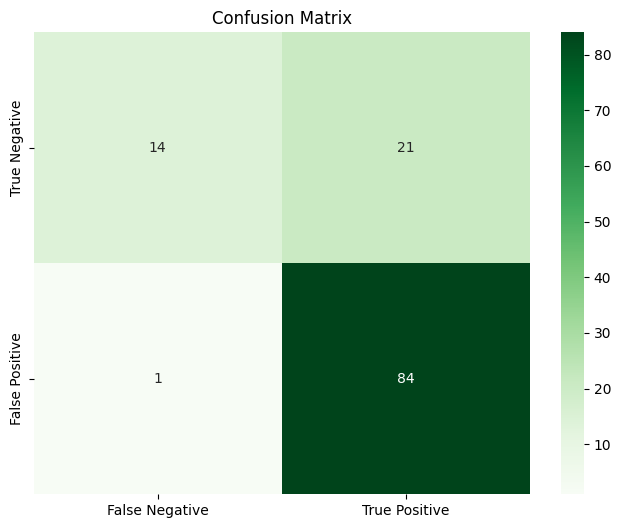

In [40]:
#Using Logistic Regression Model for prediciton
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("LogisticRegression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))

# Creating a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()


In [81]:
# Creating a dictionary to store all accuracy score dervied from all models prediciton
models = {
    'RandomForestClassifier': accuracy_score(y_test, y_pred_rfc),
    'KNeighborsClassifier': accuracy_score(y_test, y_pred_knn),
    'SVC': accuracy_score(y_test, y_pred_svc),
    'LogisticRegression': accuracy_score(y_test, y_pred_log),
    'XGBClassifier': accuracy_score(y_test, y_pred_xgb),
    'DecisionTreeClassifier': accuracy_score(y_test, y_pred_dt),
    'GaussianNB': accuracy_score(y_test, nb_pred)

}

# this function takes all accuracy scores and prints them out individually but rounds down to 2 significant levels
for model_name, accuracy in models.items():
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")


RandomForestClassifier Accuracy: 82.50%
KNeighborsClassifier Accuracy: 65.83%
SVC Accuracy: 70.00%
LogisticRegression Accuracy: 81.67%
XGBClassifier Accuracy: 80.83%
DecisionTreeClassifier Accuracy: 75.00%
GaussianNB Accuracy: 80.00%


# **Expanded Models**

### **XGBOOST Classifier**

XGBClassifier log loss:  0.6322677356006212


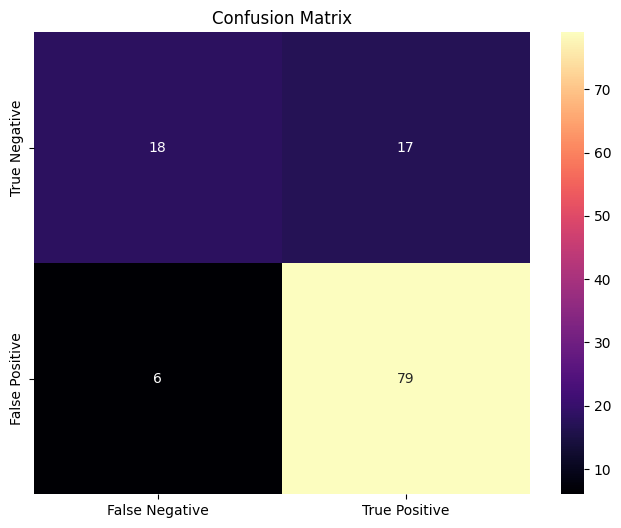

In [48]:
# Importing the Xgboost Classifier and the log_loss function
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss') # initializing the model
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

y_pred_proba = xgb.predict_proba(X_test)
value_logloss = log_loss(y_test, y_pred_proba)
print("XGBClassifier log loss: ", value_logloss)
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='magma',
            xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()


### **DecisionTree Classifier**

Accuracy Score of Decision Tree Classifier: 75.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57        35
           1       0.82      0.82      0.82        85

    accuracy                           0.75       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.75      0.75      0.75       120

Confusion Matrix:
 [[20 15]
 [15 70]]


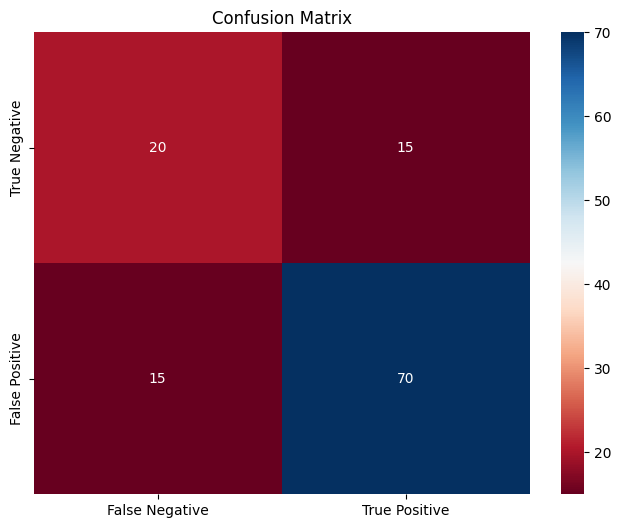

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier(random_state= 42)
dt.fit(X_train, y_train) #fitting the model on the training data
y_pred_dt = dt.predict(X_test) # Here the model will predict on test data


dt_accuracy = accuracy_score(y_test, y_pred_dt) # this will generate the accuracy score
print(f"Accuracy Score of Decision Tree Classifier: {dt_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt)) # this will generate the classification report


# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu',
            xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()


### **Naive Bayes**

Accuracy Score of Naive Bayes Classifier: 80.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.81      0.94      0.87        85

    accuracy                           0.80       120
   macro avg       0.78      0.70      0.72       120
weighted avg       0.79      0.80      0.78       120

Confusion Matrix:
 [[16 19]
 [ 5 80]]


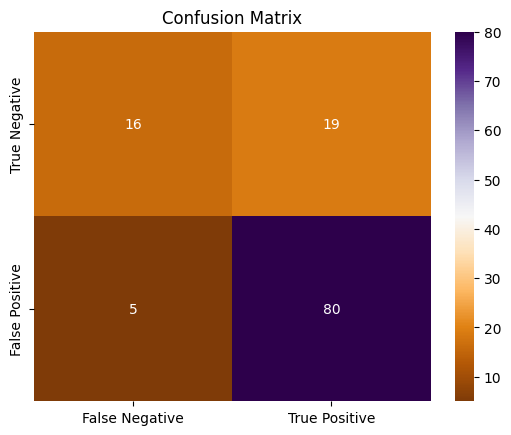

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


nb_model = GaussianNB() #Initializing the NaiveBayes model
nb_model.fit(X_train, y_train) #fiting the model to the training set
nb_pred = nb_model.predict(X_test) #Utilizing the model for prediction

#Generating Accuracy score and a classification report of all metrics
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Accuracy Score of Naive Bayes Classifier: {nb_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, nb_pred))

#Generating the Confusion matrix
cm = confusion_matrix(y_test, nb_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='PuOr',
            xticklabels=['False Negative', 'True Positive'],
            yticklabels=['True Negative', 'False Positive'])
plt.title('Confusion Matrix')
plt.show()

### **Comparison of all Models**

In [79]:
# Using a Dictionary to store model names and results
results = []

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": round(accuracy_score(y_test, lr_pred) * 100, 5),
    "Confusion Matrix": confusion_matrix(y_test, lr_pred)
})

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
results.append({
    "Model": "SVC",
    "Accuracy": round(accuracy_score(y_test, svc_pred) * 100),
    "Confusion Matrix": confusion_matrix(y_test, svc_pred)
})

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results.append({
    "Model": "Random Forest",
    "Accuracy": round(accuracy_score(y_test, rf_pred) * 100),
    "Confusion Matrix": confusion_matrix(y_test, rf_pred)
})

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
results.append({
    "Model": "KNN",
    "Accuracy": round(accuracy_score(y_test, knn_pred) * 100),
    "Confusion Matrix": confusion_matrix(y_test, knn_pred)
})

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
results.append({
    "Model": "Decision Tree",
    "Accuracy": round(accuracy_score(y_test, dt_pred) * 100,),
    "Confusion Matrix": confusion_matrix(y_test, dt_pred)
})

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
results.append({
    "Model": "Naive Bayes",
    "Accuracy": round(accuracy_score(y_test, nb_pred) * 100,),
    "Confusion Matrix": confusion_matrix(y_test, nb_pred)
})

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
results.append({
    "Model": "XGBoost",
    "Accuracy": round(accuracy_score(y_test, xgb_pred) * 100),
    "Confusion Matrix": confusion_matrix(y_test, xgb_pred)
})

# Display Results
models_df = pd.DataFrame(results)
models_df[['Model', 'Accuracy']]


,Model,Accuracy
0,Logistic Regression,81.66667
1,SVC,70.00000
2,Random Forest,82.00000
3,KNN,66.00000
4,Decision Tree,75.00000
5,Naive Bayes,80.00000
6,XGBoost,81.00000


#### **Proof of Statisitcal Significance of Model's Performance using the 80-20 scale for split test**

In [84]:
#Importing Cross validation score and Kruskal functions from the SKlearn library
from sklearn.model_selection import cross_val_score
from scipy.stats import kruskal

# Defining models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Collecting cross-validation scores (10-fold)
model_scores = {}
for name, model in models.items():
    '''
    this function collects all scores and performs a cross validation across
    all scores
    '''
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    model_scores[name] = scores
    print(f"{name}: Mean Accuracy = {scores.mean():.2f}, Std = {scores.std():.4f}")

# Performing Kruskal-Wallis test
stat, p = kruskal(*model_scores.values())
print(f"\nKruskal-Wallis H-statistic = {stat:.2f}, p-value = {p:.4f}")

if p < 0.05:
    print("Accepted= H0: there is a statistically significant difference found between models. \n Therefore we reject H1")
else:
    print("Accepted= H1: there is no statistically significant difference found between models.]\n Therefore we reject H0")


Logistic Regression: Mean Accuracy = 0.81, Std = 0.0324
SVC: Mean Accuracy = 0.68, Std = 0.0133
Random Forest: Mean Accuracy = 0.80, Std = 0.0443
KNN: Mean Accuracy = 0.61, Std = 0.0367
Decision Tree: Mean Accuracy = 0.73, Std = 0.0437
Naive Bayes: Mean Accuracy = 0.79, Std = 0.0332
XGBoost: Mean Accuracy = 0.78, Std = 0.0429

Kruskal-Wallis H-statistic = 48.99, p-value = 0.0000
Accepted= H0: there is a statistically significant difference found between models. 
 Therefore we reject H1


- Observation:

With a H statitic of 46.51 when cross checked with the degree of freedom based on the group provided, and also having a p-value of 0.00 which is less than 0.05, this shows that there is strong evidence against the null hypothesis, therefore, we reject the alternative hypothesis and accept the null hypothesis, indicating ***that there is a statistically significant difference between the performance of the models.***


### **Using Dunn's Test to actually check the significant difference of each group after utilizing Kruskal Wallis test**

In [54]:
!pip install scikit-posthocs

In [66]:
# Importing the downloaded scikit_posthocs module
import scikit_posthocs as sp

# Converting DataFrame using the previous model_scores for post-hoc
df_scores = pd.DataFrame(model_scores)
df_scores.value_counts()

# # # Perform Dunn’s post-hoc test with Bonferroni correction
# sp.posthoc_dunn(df_scores, p_adjust='bonferroni')


Logistic Regression  SVC       Random Forest  KNN       Decision Tree  Naive Bayes  XGBoost 
0.750000             0.650000  0.733333       0.550000  0.716667       0.750000     0.750000    1
0.766667             0.683333  0.750000       0.583333  0.733333       0.766667     0.750000    1
0.783333             0.683333  0.800000       0.616667  0.650000       0.783333     0.766667    1
0.800000             0.683333  0.850000       0.650000  0.750000       0.800000     0.850000    1
                     0.700000  0.783333       0.616667  0.733333       0.783333     0.733333    1
0.813559             0.677966  0.728814       0.576271  0.661017       0.728814     0.745763    1
0.816667             0.683333  0.766667       0.683333  0.766667       0.816667     0.716667    1
0.830508             0.694915  0.864407       0.593220  0.847458       0.830508     0.830508    1
0.833333             0.666667  0.816667       0.633333  0.750000       0.816667     0.800000    1
0.866667             0.683333  0.833333       0.600000  0.766667       0.833333     0.816667    1
Name: count, dtype: int64

In [73]:
# Reshaping DataFrame to long format
corrected_df = pd.melt(df_scores.reset_index(), id_vars=['index'], var_name='groups', value_name='values')
corrected_df.head(50)

,index,groups,values
0,0,Logistic Regression,0.800000
1,1,Logistic Regression,0.816667
2,2,Logistic Regression,0.750000
3,3,Logistic Regression,0.783333
4,4,Logistic Regression,0.766667
5,5,Logistic Regression,0.800000
6,6,Logistic Regression,0.866667
7,7,Logistic Regression,0.833333
8,8,Logistic Regression,0.813559
9,9,Logistic Regression,0.830508


In [74]:
# Performing Dunn’s post-hoc test with Bonferroni correction
sp.posthoc_dunn(corrected_df, val_col='values', group_col='groups', p_adjust='bonferroni')

,Decision Tree,KNN,Logistic Regression,Naive Bayes,Random Forest,SVC,XGBoost
Decision Tree,1.000000,0.094801,0.443380,1.000000,1.000000,1.000000,1.000000
KNN,0.094801,1.000000,0.000006,0.000073,0.000071,1.000000,0.001099
Logistic Regression,0.443380,0.000006,1.000000,1.000000,1.000000,0.001324,1.000000
Naive Bayes,1.000000,0.000073,1.000000,1.000000,1.000000,0.009966,1.000000
Random Forest,1.000000,0.000071,1.000000,1.000000,1.000000,0.009763,1.000000
SVC,1.000000,1.000000,0.001324,0.009966,0.009763,1.000000,0.078283
XGBoost,1.000000,0.001099,1.000000,1.000000,1.000000,0.078283,1.000000


since our p-value is 0.000, this output shows that some or the majority of the models have higher or lower values in comparison, this indicates that there are
statistically significant differences in the performance between many pairs of the models we compared. This allows us to reject the alternative for those comparisons, providing evidence that some models perform significantly better than others."

